# IMPORT THE FILES 

In [1]:
import pandas as pd
import numpy as np

In [2]:
#import the data 
busines = pd.read_csv('business.csv')
economy  =  pd.read_csv('economy.csv')

In [3]:
busines.head(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [4]:
economy.head(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [5]:
print(busines.shape,economy.shape)

(93487, 11) (206774, 11)


In [6]:
print(f"so we have info for {busines.shape[0]} number of bussines class flights and \n {economy.shape[0]} number of economy class flights")

so we have info for 93487 number of bussines class flights and 
 206774 number of economy class flights


# Data Cleaning and Basic Info

In [7]:
# check for nulls
economy.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

In [8]:
busines.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

In [9]:
# no null thats good

### Concatenate the dataframes 

In [10]:
busines['class'] = 'bussines'
economy['class'] = 'economy'
flights = pd.concat((busines,economy),axis=0)

In [11]:
flights

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",bussines
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",bussines
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",bussines
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",bussines
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",bussines
...,...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697",economy
206770,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709",economy
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",economy
206772,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",economy


In [12]:
flights.head(1)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",bussines


In [13]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300261 entries, 0 to 206773
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
 11  class       300261 non-null  object
dtypes: int64(1), object(11)
memory usage: 29.8+ MB


### we have to change the type of some features

In [14]:
flights['price'] = flights['price'].str.replace(',','')


flights['price'] = flights['price'].astype('int32')

## some columns are datetimes so we change them starting with date:


In [15]:
flights['date'] = pd.to_datetime(flights['date'],format='%d-%m-%Y')
flights['year'] = flights['date'].dt.year
flights['month'] = flights['date'].dt.month
flights['day'] = flights['date'].dt.day
flights.drop(columns=['date'],inplace=True)

In [16]:
flights.head(1)

,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,year,month,day
0,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,25612,bussines,2022,2,11


In [17]:
flights.shape

(300261, 14)

## then departure and arrival time we will make them as parts of the day :

In [18]:
flights['dep_time'] = flights['dep_time'].str[:2]
#flights['dep_time'] = flights['dep_time'].str.replace('0','')



flights['arr_time'] = flights['arr_time'].str[:2]
#flights['arr_time'] = flights['arr_time'].str.replace('0','')





In [19]:
flights['dep_time'] = flights['dep_time'].astype('int32')
flights['arr_time'] = flights['arr_time'].astype('int32')

In [20]:
def times(i):
    y = []
    for x in i : 
        if x > 0 and x < 7 :
            y.append('night')
        elif x >7 and x < 12 :
            y.append('morning')
        elif x > 12 and x < 17:
            y.append('midday')
        else :
            y.append('afternoom')
    return y 


deptimes = flights['dep_time'].values
new_values_dep = times(deptimes)

artimes = flights['arr_time'].values
new_values_ar = times(artimes)



        
    
  
    
    
    
    


In [21]:
flights['arrival'] = new_values_ar
flights['departure'] = new_values_dep

In [22]:
flights.drop(columns=['arr_time','dep_time'],inplace=True)

## lets deal with the number of stops column:

In [23]:
flights.stop.unique()
flights['stop'] = flights['stop'].str[:1]

In [24]:
flights['stop'] = flights['stop'].replace('n','0')

In [25]:
flights.stop.unique()

array(['0', '1', '2'], dtype=object)

In [26]:
flights['stop'] = flights['stop'].astype('int32')

In [27]:
flights.head(1)

,airline,ch_code,num_code,from,time_taken,stop,to,price,class,year,month,day,arrival,departure
0,Air India,AI,868,Delhi,02h 00m,0,Mumbai,25612,bussines,2022,2,11,afternoom,afternoom


## lets deal with the column time_taken
## by replacing it with the total duration in minutes 


In [28]:

time_t = flights['time_taken'].values

new = []
for i in time_t:
    new.append(i.split(' '))

final = []
for i in new:
    h = i[0]
    m = i[1]
    hours = h[:2]
    
    replacements = {'2h':'2','7h':'7','5h':'5','1.':'1'}
    for key,value in replacements.items():
        hours = hours.replace(key,value)
        
    hours = int(hours)*60
    mins = m[:2]
    mins = mins.replace('m','0')
    mins = int(mins)
    final.append(hours+mins)



In [29]:
flights['duration'] = final
flights.drop(columns=['time_taken'],inplace=True)

In [30]:
flights.head(4)

,airline,ch_code,num_code,from,stop,to,price,class,year,month,day,arrival,departure,duration
0,Air India,AI,868,Delhi,0,Mumbai,25612,bussines,2022,2,11,afternoom,afternoom,120
1,Air India,AI,624,Delhi,0,Mumbai,25612,bussines,2022,2,11,afternoom,afternoom,135
2,Air India,AI,531,Delhi,1,Mumbai,42220,bussines,2022,2,11,afternoom,afternoom,1485
3,Air India,AI,839,Delhi,1,Mumbai,44450,bussines,2022,2,11,afternoom,afternoom,1590


In [31]:
# ch_code and num_core are not usefull so : 
flights.drop(columns=['ch_code','num_code'],inplace=True)

#  EXPLORIDATORY ANALYSIS

### first lets see for how many years and months we have data:


In [32]:
print(f"we have  data for {flights['year'].nunique()} years and {flights['month'].nunique()}  months")

we have  data for 1 years and 2  months


#### so we drop year


In [33]:
flights.drop(columns=['year'],inplace=True)

###  lets see how many airline companies and cities we have:


In [34]:
print(f"we have {flights['airline'].nunique()} number of airlines , {flights['from'].nunique()} departure cities and {flights['to'].nunique()} destination cities")

we have 8 number of airlines , 6 departure cities and 6 destination cities


### now lets see some general statistical info

In [35]:
flights.describe()

,stop,price,month,day,duration
count,300261.000000,300261.000000,300261.000000,300261.000000,300261.000000
mean,0.924213,20883.717666,2.664995,17.384619,733.065416
std,0.398188,22695.911266,0.471993,8.074005,431.576241
min,0.000000,1105.000000,2.000000,1.000000,50.000000
25%,1.000000,4783.000000,2.000000,12.000000,405.000000
50%,1.000000,7425.000000,3.000000,18.000000,675.000000
75%,1.000000,42521.000000,3.000000,24.000000,970.000000
max,2.000000,123071.000000,3.000000,31.000000,2990.000000


In [36]:
import matplotlib.pyplot as plt

import seaborn as sns


#### ignore warnings 

In [37]:
import warnings 

warnings.filterwarnings("ignore")

### lets see the distribution of the prices 

<Axes: xlabel='price', ylabel='Count'>

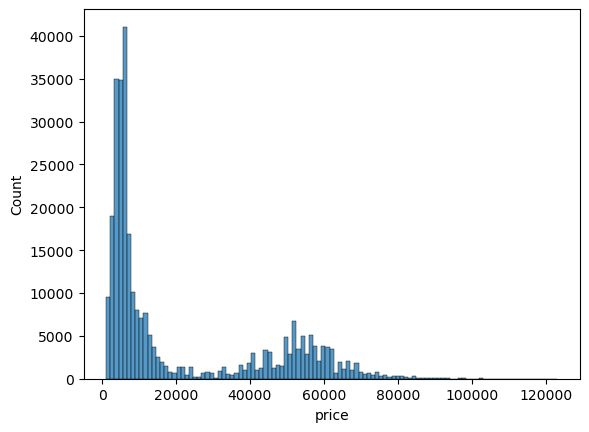

In [38]:



sns.histplot(flights['price'])

###  seems like we have an outlier


In [39]:
flights.query('price > 120000')

,airline,from,stop,to,price,class,month,day,arrival,departure,duration
54711,Vistara,Kolkata,1,Delhi,123071,bussines,2,13,afternoom,morning,810


### so we will use z-scores to see : 
#### but because its a bussines class and we have two distributions as we can see from the graph, we will use the business class mean and std to see if its actualy an outlier

In [40]:
 

bus = flights.loc[flights['class']=='bussines']


mean = np.mean(bus.price)
std = np.std(bus.price)

print(f" mean of bussines is {mean} and std = {std}")

threshold = 4

z = (123071-mean)/std 
if z > threshold: 
    print(f" z value is equal to : {z} that means this price is {z} stds away from the mean so we will consider it an outlier" )


 mean of bussines is 52540.08112357868 and std = 12969.245242027398
 z value is equal to : 5.438321009449558 that means this price is 5.438321009449558 stds away from the mean so we will consider it an outlier


In [41]:
flights.drop(flights[flights['price'] == 123071].index,inplace=True)
# droped 

### lets see the distribution of stops 

<Axes: xlabel='stop', ylabel='Count'>

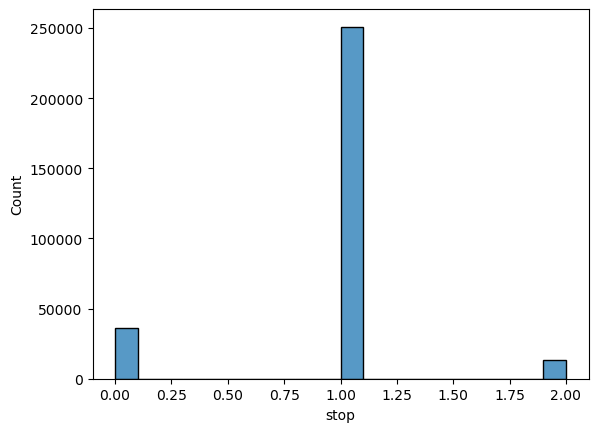

In [42]:
sns.histplot(flights.stop)

### nothing special here a lot of flights with 1 stop and much less with 0 and 2 

## lets see the distribution of arivals and departures

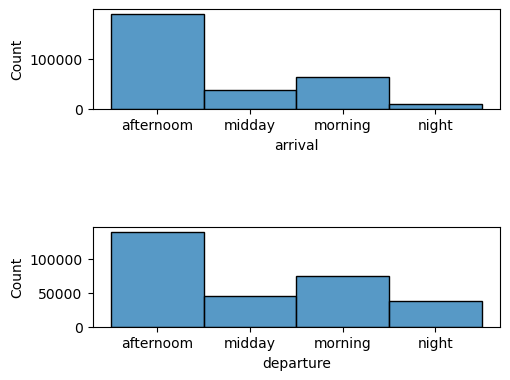

In [43]:
x = ['arrival','departure']
for i in range(1,len(x)+1):
    
    ax = plt.subplot(2,1,i)
    plt.tight_layout(pad=5.0)
    sns.histplot(flights[x[i-1]])

#### everithing is okey most flights are leaving in the afternoom and ariving also at the same space of time 

### lets see the distribution of airlines total flights

In [44]:
airlines = flights.groupby('airline').count()['from'].reset_index().rename(columns={'from':'total_flights'})

In [45]:
airlines

,airline,total_flights
0,Air India,80894
1,AirAsia,16098
2,GO FIRST,23176
3,Indigo,43120
4,SpiceJet,9011
5,StarAir,61
6,Trujet,41
7,Vistara,127858


<BarContainer object of 8 artists>

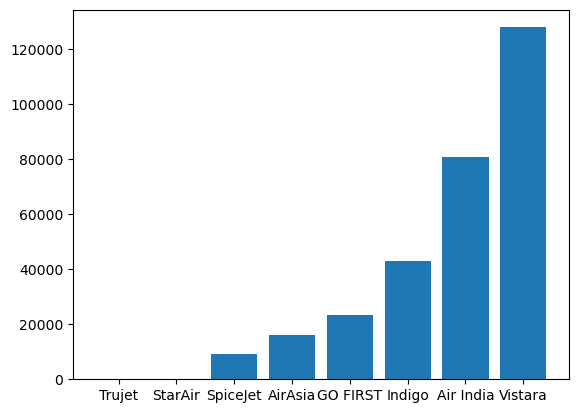

In [46]:
airlines = airlines.sort_values(by='total_flights')
fig , ax = plt.subplots()
ax.bar(airlines['airline'],airlines['total_flights'])


##### we can see there is a big diference in the total flights per airline company ! 
#### especialy with StarAir   and Trujet   
##### now we will try to figure out why

In [47]:


mean_airline = flights.groupby(['airline','class'])['price'].aggregate('mean')




In [48]:
mean_airline

airline    class   
Air India  bussines    47131.039212
           economy      7313.730144
AirAsia    economy      4091.072742
GO FIRST   economy      5651.954306
Indigo     economy      5324.216303
SpiceJet   economy      6179.278881
StarAir    economy      4932.655738
Trujet     economy      3244.634146
Vistara    bussines    55475.912144
           economy      7806.943645
Name: price, dtype: float64

#### first reason is that only two airlines those with the most flights ,can provide a bussines class 

#### lets see what else might hapening 
#### we will se  if they dont have flights from all to all places

In [49]:
def check(airline):
    a = flights.loc[flights['airline'] == airline, 'from'].value_counts()
    b = flights.loc[flights['airline'] == airline, 'to'].value_counts()
    return(f' airline {airline} have departures from cities:  {list(a.index.values)} and destinations the cities {list(b.index.values)}')
    

In [50]:
a = check('Trujet')
print(a)
print(['-' for i in range(10)])
a = check('StarAir')
print(a)
print(['-' for i in range(10)])
a = check('Vistara')
print(a)
print(['-' for i in range(10)])
a = check('SpiceJet')
print(a)
print(['-' for i in range(10)])
a = check('Indigo')
print(a)
print(['-' for i in range(10)])
a = check('GO FIRST')
print(a)
print(['-' for i in range(10)])
a = check('Air India')
print(a)

 airline Trujet have departures from cities:  ['Hyderabad', 'Mumbai', 'Bangalore'] and destinations the cities ['Bangalore', 'Hyderabad', 'Mumbai']
['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
 airline StarAir have departures from cities:  ['Bangalore', 'Hyderabad'] and destinations the cities ['Hyderabad', 'Bangalore']
['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
 airline Vistara have departures from cities:  ['Mumbai', 'Bangalore', 'Delhi', 'Hyderabad', 'Kolkata', 'Chennai'] and destinations the cities ['Mumbai', 'Bangalore', 'Delhi', 'Hyderabad', 'Kolkata', 'Chennai']
['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
 airline SpiceJet have departures from cities:  ['Delhi', 'Kolkata', 'Mumbai', 'Bangalore', 'Chennai', 'Hyderabad'] and destinations the cities ['Delhi', 'Kolkata', 'Mumbai', 'Chennai', 'Bangalore', 'Hyderabad']
['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
 airline Indigo have departures from cities:  ['Delhi', 'Mumbai', 'Kolkata', 'Bangalore', 'Chenn

### this might be a reason because they have flights between 2 and 3 cities when we have 6 cities , in contrast the other companies flight from and to all cities, but we cant investigate further with the current data 

### lets now see the distribution of the starting cities and arriving cities :

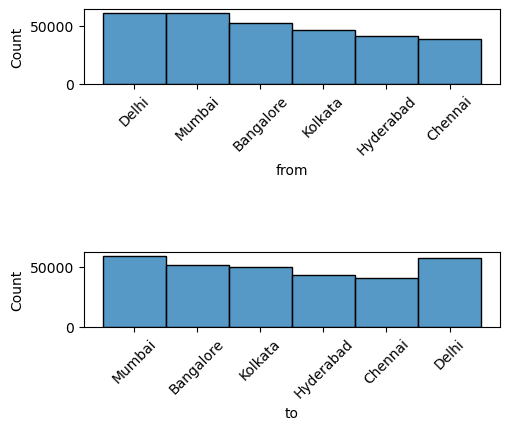

In [51]:
x = ['from','to']
for i in range(1,len(x)+1):
    
    ax = plt.subplot(2,1,i)
    plt.tight_layout(pad=5.0)
    plt.xticks(rotation=45)
    sns.histplot(flights[x[i-1]])

#### almost evenly distributed but Delhi and Mumbai as the bigest cities have more flights

### lets now see the distribution of flights in  months and days :


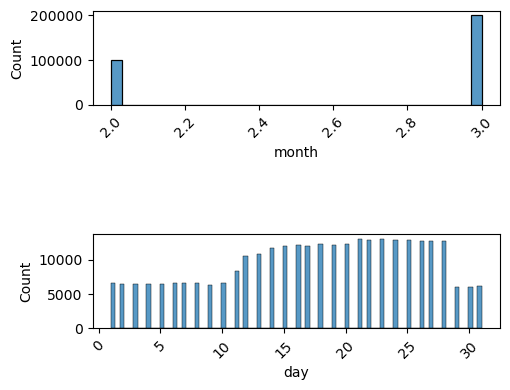

In [52]:
x = ['month','day']
for i in range(1,len(x)+1):
    
    ax = plt.subplot(2,1,i)
    plt.tight_layout(pad=5.0)
    plt.xticks(rotation=45)
    sns.histplot(flights[x[i-1]])

### what we can unserstand from here is that people tend to fly around 13-27 of month but we have data for only two months , so we cant say for sure


### and last lets check the distribution of class : 


<Axes: xlabel='class', ylabel='Count'>

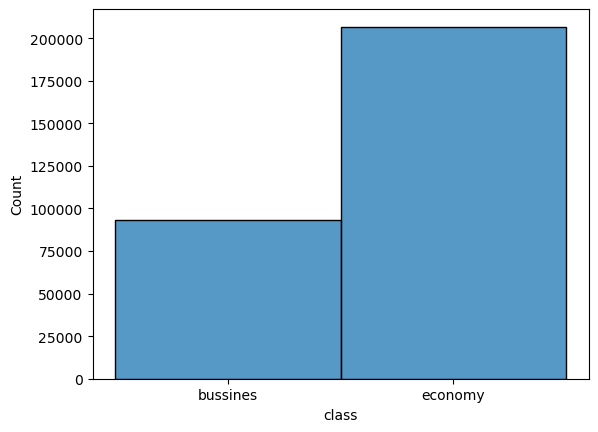

In [53]:
sns.histplot(flights['class'])

### and as we expected busines class flights are less than economy class

# correlations 

### before we see the correlations we have to convert the categorical columns to numeric ones
### but we will make a copy of the original dataframe and we will work with it

In [54]:


df = flights.copy(deep=True)



In [55]:
df.head(1)

,airline,from,stop,to,price,class,month,day,arrival,departure,duration
0,Air India,Delhi,0,Mumbai,25612,bussines,2,11,afternoom,afternoom,120


In [56]:
from sklearn.preprocessing import LabelEncoder as le

encoder1 = le()
df['airline'] = encoder1.fit_transform(df['airline'])

encoder2 = le()
df['from'] = encoder2.fit_transform(df['from'])
df['to'] = encoder2.transform(df['to'])

df['class'].replace({'bussines':0,'economy':1},inplace=True)

encoder3 = le()
df['arrival'] = encoder3.fit_transform(df['arrival'])
df['departure'] = encoder3.transform(df['departure'])




In [57]:
df.head(10)

,airline,from,stop,to,price,class,month,day,arrival,departure,duration
0,0,2,0,5,25612,0,2,11,0,0,120
1,0,2,0,5,25612,0,2,11,0,0,135
2,0,2,1,5,42220,0,2,11,0,0,1485
3,0,2,1,5,44450,0,2,11,0,0,1590
4,0,2,1,5,46690,0,2,11,0,0,400
5,7,2,0,5,50264,0,2,11,0,0,130
6,0,2,1,5,50669,0,2,11,1,0,1065
7,0,2,1,5,51059,0,2,11,0,0,1365
8,7,2,1,5,51731,0,2,11,1,0,1075
9,7,2,0,5,53288,0,2,11,0,0,135


### lets visualize the correlations

In [58]:
pip install seaborn --upgrade

<Axes: >

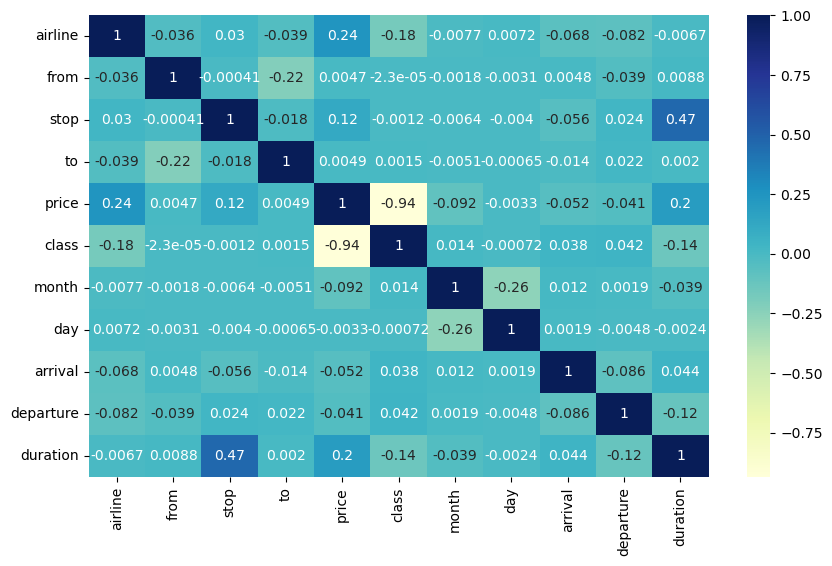

In [59]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

###  our data have a significant amount of correlation among them 

## we will see in details when its time to train our model

# questions to awsner

### we have some questions to awnser  : 


### a)Does price vary with Airlines?
### b) Does ticket price change based on the departure time and arrival time?
### c) How the price changes with change in Source and Destination?
### d) How does the ticket price vary between Economy and Business class?
### e) To where moslty the bussines class flights go ?
### f) Which ailine have the most flights from mumbai ? 
### 

## a)Does price vary with Airlines?
### to awsner this we have to see the correlation and the p value between price and airlines :
 

In [60]:

from scipy.stats import pearsonr

airlines = df.airline.values
prices = df.price.values

cor,p = pearsonr(airlines,prices)
print(f" we have a correlation of {cor}  and a p value equal to {p}")

 we have a correlation of 0.24370288386431885  and a p value equal to 0.0


#### because p value is almost zero that means that its almost imposible to see something like that random and because we have enough data we consider the correlation of 0.25 to be legit

## b) Does ticket price change based on the departure time and arrival time?
### we will go with the same aproach as in the question a 

In [61]:
df.head(1)

,airline,from,stop,to,price,class,month,day,arrival,departure,duration
0,0,2,0,5,25612,0,2,11,0,0,120


In [62]:
arrive = df.arrival.values
dep = df.departure.values
price = df.price.values

cor1,p1 = pearsonr(arrive,price)
p1=f'{p1:.9f}'

print(f"between arriving time and price  we have a correlation of {cor1}  and a p value equal to {p1}")


cor2,p2 = pearsonr(dep,price)
p2=f'{p2:.9f}'

                   
print(f"between departure time and price  we have a correlation of {cor2}  and a p value equal to {p2}")

between arriving time and price  we have a correlation of -0.05244067367919127  and a p value equal to 0.000000000
between departure time and price  we have a correlation of -0.040887452639962275  and a p value equal to 0.000000000


### so, its not a very strong correlation but there is some correlation , bigger between arriving time and price than departure time and price , and p value almost zero 

## c) How the price changes with change in Source and Destination?
### same aproach here also  : 

In [63]:
fromm = df['from'].values
to = df.to.values
price = df.price.values

cor1,p1 = pearsonr(fromm,price)
p1=f'{p1:.9f}'

print(f"between departure place  and price  we have a correlation of {cor1}  and a p value equal to {p1}")


cor2,p2 = pearsonr(to,price)
p2=f'{p2:.9f}'

                   
print(f"between destination place and price  we have a correlation of {cor2}  and a p value equal to {p2}")

between departure place  and price  we have a correlation of 0.004673721849396739  and a p value equal to 0.010436805
between destination place and price  we have a correlation of 0.004896412895695218  and a p value equal to 0.007295667


### there is a very small correlation , not singificly important , so we could say that the price change little to none in correlation with destination or source

## d) How does the ticket price vary between Economy and Business class?

In [64]:
clas = df['class'].values
price = df.price.values

cor1,p1 = pearsonr(clas,price)
p1=f'{p1:.9f}'

print(f"between price and flights class  we have a correlation of {cor1}  and a p value equal to {p1}")

between price and flights class  we have a correlation of -0.9378808288165039  and a p value equal to 0.000000000


### that means we have a very strong correlation between class and price 

### e) To where moslty the bussines class flights go ?

In [65]:
flights.head(1)

,airline,from,stop,to,price,class,month,day,arrival,departure,duration
0,Air India,Delhi,0,Mumbai,25612,bussines,2,11,afternoom,afternoom,120


In [66]:
f = pd.crosstab(flights['class'],flights['to'])

In [67]:
f = f.reset_index()
f = f.loc[f['class']=='bussines']
f.drop(columns=['class'],inplace=True)

In [68]:
f

to,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,16198,13158,16706,13675,14758,18991


In [69]:
cols = f.columns
vals = f.values

In [70]:
vals = vals[0]


In [71]:
mx = 0
target = ''
for i in range(len(cols)):
    if  vals[i] > mx:
        mx = vals[i]
        target = cols[i]

print(f'the city where most of the bussines class flights goes to is {target} with {mx} numer of flights')

the city where most of the bussines class flights goes to is Mumbai with 18991 numer of flights


### e) Which ailine have the most flights from mumbai ?

In [72]:
g = pd.crosstab(flights['airline'],flights['from'])

In [73]:
g = pd.DataFrame(g).reset_index()
g = g[['airline','Mumbai']]
g.sort_values('Mumbai',ascending=False,inplace=True)


In [74]:
g

from,airline,Mumbai
7,Vistara,25535
0,Air India,18377
3,Indigo,7506
2,GO FIRST,5567
1,AirAsia,2176
4,SpiceJet,1734
6,Trujet,7
5,StarAir,0


In [75]:
print(f" the airline with the most flights from mumbai is {g.iloc[0].values[0]} with {g.iloc[0].values[1]} total flights")

 the airline with the most flights from mumbai is Vistara with 25535 total flights


<BarContainer object of 8 artists>

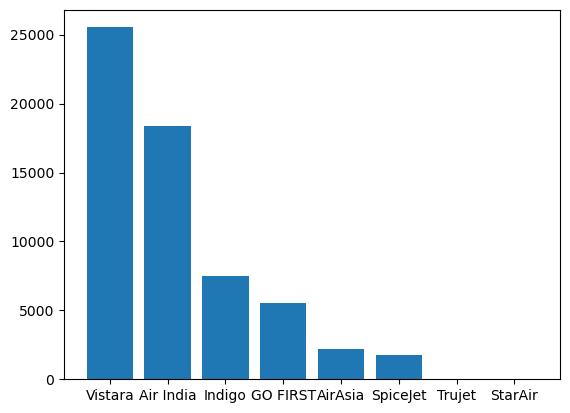

In [76]:
plt.bar(g.airline,g['Mumbai'])

# MODELING 

## now we have to make a model to predict the prices !

## we will use the non categorical dataframe : df 

In [77]:
df.head(5)

,airline,from,stop,to,price,class,month,day,arrival,departure,duration
0,0,2,0,5,25612,0,2,11,0,0,120
1,0,2,0,5,25612,0,2,11,0,0,135
2,0,2,1,5,42220,0,2,11,0,0,1485
3,0,2,1,5,44450,0,2,11,0,0,1590
4,0,2,1,5,46690,0,2,11,0,0,400


### before everithing lets check for multicolinearity in our data and the correlations with the depended variable 

## checking for multicolinearity between the independed variables , considering a set multicoinear  when the correlation is bigget than 0.7

In [78]:
cors = df.drop(columns=['class']).corr()

In [79]:
cols = cors.columns
cc = []
for i in cols:
    x = cors.loc[abs(cors[i]) > 0.7,i]
    cc.append((i , x.values[0] ,x.index[0]))

In [80]:
for i in cc : 
    print(f'{i[0]}  has  {i[1]}   correlation with   {i[2]}')


airline  has  1.0   correlation with   airline
from  has  1.0   correlation with   from
stop  has  1.0   correlation with   stop
to  has  1.0   correlation with   to
price  has  1.0   correlation with   price
month  has  1.0   correlation with   month
day  has  1.0   correlation with   day
arrival  has  1.0   correlation with   arrival
departure  has  1.0   correlation with   departure
duration  has  1.0   correlation with   duration


### they are only correlated  with |correlation| >0.7 only with themselfs which is normal , but beside that no correlation biger than 0.7 so we can continue:

## now we will see the depended variable correlations :

In [81]:
depended = []
for i in cols:
    x = df['price'].corr(df[i])
    depended.append((i , x))

In [82]:
for i in depended : 
    print(i)

('airline', 0.2437028838643188)
('from', 0.0046737218493970055)
('stop', 0.11979941207814344)
('to', 0.0048964128956951875)
('price', 1.0)
('month', -0.0923076036391361)
('day', -0.0032570012926162644)
('arrival', -0.05244067367919116)
('departure', -0.04088745263996209)
('duration', 0.2044761405422031)


### we could not use the features with the too small corelation but we will train the models and if we ovverfit we will remove them 

## now we can procced to the modeling 

In [83]:
# split in x and y 
x = df.drop(columns=['price']).values

In [84]:
y = df['price'].values

In [85]:
print(x)

[[   0    2    0 ...    0    0  120]
 [   0    2    0 ...    0    0  135]
 [   0    2    1 ...    0    0 1485]
 ...
 [   7    1    1 ...    2    0 1235]
 [   7    1    1 ...    2    2 1400]
 [   7    1    1 ...    0    0 1465]]


In [86]:
print(y)

[25612 25612 42220 ...  8640  8640  8640]


In [87]:
# now we have to split it in train and test

from sklearn.model_selection import train_test_split as tt
x_train,x_test,y_train,y_test = tt(x,y,test_size=0.2)

In [88]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)


(240207, 10) (60052, 10)
(240207,) (60052,)


In [89]:
# scale the data with Standard Scaler because they tend to a normal destribution and they dont have fixed values 
from sklearn.preprocessing import StandardScaler as ss

In [90]:
scaler = ss()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [91]:
x_train

array([[-0.24653291,  0.24153845,  0.18964103, ...,  1.49050076,
        -0.93759147, -0.34425078],
       [ 1.08598131,  1.38317728,  0.18964103, ...,  1.49050076,
        -0.93759147,  0.26984025],
       [ 1.08598131, -1.47091979,  0.18964103, ..., -0.70218078,
         0.86414401,  0.13080077],
       ...,
       [-1.24591857, -0.32928096,  0.18964103, ..., -0.70218078,
         0.86414401,  0.33935999],
       [-1.24591857,  1.38317728,  2.70485841, ...,  0.39415999,
        -0.93759147,  2.22797956],
       [ 1.08598131,  1.38317728,  0.18964103, ...,  0.39415999,
        -0.93759147, -0.7034361 ]])

In [92]:
x_test

array([[ 1.08338409, -0.90166589,  0.193079  , ...,  1.49273624,
         0.86089102,  1.51451888],
       [-0.24884446,  0.240275  ,  0.193079  , ..., -0.7023222 ,
        -0.03916343, -0.50053351],
       [-1.24801588,  0.240275  ,  0.193079  , ..., -0.7023222 ,
         1.76094546,  0.40276583],
       ...,
       [-0.5819016 , -0.33069545,  0.193079  , ..., -0.7023222 ,
        -0.03916343, -0.74372949],
       [-1.24801588,  0.81124544,  0.193079  , ...,  1.49273624,
        -0.93921788,  0.7386079 ],
       [ 1.08338409,  0.240275  ,  0.193079  , ..., -0.7023222 ,
        -0.93921788, -0.29207982]])

## now we will train some models and measure their performance

####  first we will create a function which will meause the performance of each model :

In [93]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
from math import sqrt
history = []
hist_df = []

def metrics(estimator,pred,actual,hist = history,features = x_train.shape[1],hist_df = hist_df):
    new = []
    n_df = []
    
    r2 = r2_score(pred,actual)
    mae = mean_absolute_error(pred,actual)
    rmse = sqrt(mean_squared_error(pred,actual))
    adjusted_r2  = 1 - (1-r2) * (len(pred)-1)/(len(pred)-features-1)
    new.append(f'{estimator} have {mae} mean absolute error , {rmse} root  mean squared error , {r2} R squared and {adjusted_r2} adjusted R squared')
    print(new)
    n_df.append((estimator,mae,rmse,r2,adjusted_r2))
    history.append(new)
    hist_df.append(n_df)

    
    
    

In [94]:
# make a griv earch cv function
from sklearn.model_selection import GridSearchCV

def grid(parameters , estimator, x = x_train,y = y_train):
    grid_s = GridSearchCV(estimator=estimator,param_grid=parameters,scoring=['r2'],cv=8,n_jobs=-1,refit=False)
    grid_s.fit(x,y)
    best_mse = grid_s.best_score_
    best_params = grid_s.best_params_
    print(f'best mse = {best_mse}')
    print(f'best params = {best_params}')

## lets go with linear regression first

In [95]:

from sklearn.linear_model import LinearRegression as lr
linear_r = lr()
linear_r.fit(x_train,y_train)
y_pred = linear_r.predict(x_test)

In [96]:
metrics(linear_r,y_pred,y_test)


['LinearRegression() have 4494.431254091641 mean absolute error , 6918.898919998365 root  mean squared error , 0.897647751216714 R squared and 0.8976307041574073 adjusted R squared']


## desesion trees 

In [97]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)

In [98]:
metrics(tree,y_pred,y_test)


['DecisionTreeRegressor(max_depth=5) have 3240.200839207524 mean absolute error , 5389.9750847090445 root  mean squared error , 0.9403265886769538 R squared and 0.9403166498998976 adjusted R squared']


## Random forest


In [99]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train,y_train)
y_pred = forest.predict(x_test)

In [100]:
metrics(forest,y_pred,y_test)


['RandomForestRegressor() have 1218.1655265376082 mean absolute error , 2915.746373659695 root  mean squared error , 0.9832766089017715 R squared and 0.9832738235732296 adjusted R squared']


## SVR

## Ridge model 

In [101]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.5)
ridge.fit(x_train,y_train)
y_pred = ridge.predict(x_test)

In [102]:
metrics(ridge,y_pred,y_test)


['Ridge(alpha=0.5) have 4494.433255651125 mean absolute error , 6918.898425624341 root  mean squared error , 0.8976473570821539 R squared and 0.897630309957203 adjusted R squared']


## gradient boost regresor 

In [103]:


from sklearn.ensemble import HistGradientBoostingRegressor 
gbr = HistGradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred = gbr.predict(x_test)

In [104]:
metrics(gbr,y_pred,y_test)


['HistGradientBoostingRegressor() have 2466.17010173806 mean absolute error , 4136.028717279077 root  mean squared error , 0.9652569736633202 R squared and 0.9652511871130734 adjusted R squared']


In [109]:
from sklearn.svm import LinearSVR
svr = LinearSVR()
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

In [110]:
metrics(svr,y_pred,y_test)


['LinearSVR() have 4220.575541367432 mean absolute error , 7188.978182466184 root  mean squared error , 0.8811591918449219 R squared and 0.881139398568968 adjusted R squared']


# ADA BOOST 

In [111]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=100)
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

In [112]:
metrics(ada,y_pred,y_test)


['AdaBoostRegressor(n_estimators=100) have 3732.0574542173595 mean absolute error , 5882.665722389487 root  mean squared error , 0.9340448334711549 R squared and 0.9340338484498313 adjusted R squared']


# Ann

In [113]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential


model = Sequential()
model.add(Input(shape=(10,)))
model.add(Dense(40,'relu'))
model.add(Dense(30,'relu'))
model.add(Dense(10,'relu'))
model.add(Dense(1,'linear'))

model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                440       
                                                                 
 dense_1 (Dense)             (None, 30)                1230      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1991 (7.78 KB)
Trainable params: 1991 (7.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [114]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['MeanSquaredError'])

In [115]:
hist = model.fit(x_train,y_train,batch_size=32,epochs=15)

Epoch 1/15


7507/7507 [==============================] - 30s 4ms/step - loss: 105586880.0000 - mean_squared_error: 105586880.0000
Epoch 2/15
7507/7507 [==============================] - 28s 4ms/step - loss: 33686028.0000 - mean_squared_error: 33686028.0000
Epoch 3/15
7507/7507 [==============================] - 32s 4ms/step - loss: 31174424.0000 - mean_squared_error: 31174424.0000
Epoch 4/15
7507/7507 [==============================] - 33s 4ms/step - loss: 30205352.0000 - mean_squared_error: 30205352.0000
Epoch 5/15
7507/7507 [==============================] - 26s 3ms/step - loss: 29542868.0000 - mean_squared_error: 29542868.0000
Epoch 6/15
7507/7507 [==============================] - 32s 4ms/step - loss: 28996856.0000 - mean_squared_error: 28996856.0000
Epoch 7/15
7507/7507 [==============================] - 33s 4ms/step - loss: 28534666.0000 - mean_squared_error: 28534666.0000
Epoch 8/15
7507/7507 [==============================] - 33s 4ms/step - loss: 28172520.0000 - mean_squared_e

In [116]:
y_pred = model.predict(x_test)

1877/1877 [==============================] - 3s 2ms/step


In [117]:
metrics(model,y_pred,y_test)

['<keras.src.engine.sequential.Sequential object at 0x000001BDA93B0050> have 3142.788225865464 mean absolute error , 5169.895633127161 root  mean squared error , 0.946195272091124 R squared and 0.9461863107600488 adjusted R squared']


# lets summarize all the models 

In [119]:
history

[['LinearRegression() have 4494.431254091641 mean absolute error , 6918.898919998365 root  mean squared error , 0.897647751216714 R squared and 0.8976307041574073 adjusted R squared'],
 ['DecisionTreeRegressor(max_depth=5) have 3240.200839207524 mean absolute error , 5389.9750847090445 root  mean squared error , 0.9403265886769538 R squared and 0.9403166498998976 adjusted R squared'],
 ['RandomForestRegressor() have 1218.1655265376082 mean absolute error , 2915.746373659695 root  mean squared error , 0.9832766089017715 R squared and 0.9832738235732296 adjusted R squared'],
 ['Ridge(alpha=0.5) have 4494.433255651125 mean absolute error , 6918.898425624341 root  mean squared error , 0.8976473570821539 R squared and 0.897630309957203 adjusted R squared'],
 ['HistGradientBoostingRegressor() have 2466.17010173806 mean absolute error , 4136.028717279077 root  mean squared error , 0.9652569736633202 R squared and 0.9652511871130734 adjusted R squared'],
 ['XGBRegressor(base_score=None, booste

In [127]:
type(hist_df)



list

In [131]:
mm = []
for i in hist_df:
    for j in i:
        aa = []
        for k in j :
            aa.append(k)
    mm.append(aa)

In [156]:
models = pd.DataFrame(mm,columns=['model','mae','rmnse','r2','adjusted_r2'])

In [157]:
models

,model,mae,rmnse,r2,adjusted_r2
0,LinearRegression(),4494.431254,6918.898920,0.897648,0.897631
1,DecisionTreeRegressor(max_depth=5),3240.200839,5389.975085,0.940327,0.940317
2,"(DecisionTreeRegressor(max_features=1.0, rando...",1218.165527,2915.746374,0.983277,0.983274
3,Ridge(alpha=0.5),4494.433256,6918.898426,0.897647,0.897630
4,HistGradientBoostingRegressor(),2466.170102,4136.028717,0.965257,0.965251
5,"XGBRegressor(base_score=None, booster=None, ca...",35323.507731,41113.382418,-10.036762,-10.038600
6,LinearSVR(),4220.575541,7188.978182,0.881159,0.881139
7,"(DecisionTreeRegressor(max_depth=3, random_sta...",3732.057454,5882.665722,0.934045,0.934034
8,<keras.src.engine.sequential.Sequential object...,3142.788226,5169.895633,0.946195,0.946186


In [158]:
models.sort_values(by='adjusted_r2',ascending=False)

,model,mae,rmnse,r2,adjusted_r2
2,"(DecisionTreeRegressor(max_features=1.0, rando...",1218.165527,2915.746374,0.983277,0.983274
4,HistGradientBoostingRegressor(),2466.170102,4136.028717,0.965257,0.965251
8,<keras.src.engine.sequential.Sequential object...,3142.788226,5169.895633,0.946195,0.946186
1,DecisionTreeRegressor(max_depth=5),3240.200839,5389.975085,0.940327,0.940317
7,"(DecisionTreeRegressor(max_depth=3, random_sta...",3732.057454,5882.665722,0.934045,0.934034
0,LinearRegression(),4494.431254,6918.898920,0.897648,0.897631
3,Ridge(alpha=0.5),4494.433256,6918.898426,0.897647,0.897630
6,LinearSVR(),4220.575541,7188.978182,0.881159,0.881139
5,"XGBRegressor(base_score=None, booster=None, ca...",35323.507731,41113.382418,-10.036762,-10.038600


In [159]:
models.sort_values(by='rmnse',ascending=True)

,model,mae,rmnse,r2,adjusted_r2
2,"(DecisionTreeRegressor(max_features=1.0, rando...",1218.165527,2915.746374,0.983277,0.983274
4,HistGradientBoostingRegressor(),2466.170102,4136.028717,0.965257,0.965251
8,<keras.src.engine.sequential.Sequential object...,3142.788226,5169.895633,0.946195,0.946186
1,DecisionTreeRegressor(max_depth=5),3240.200839,5389.975085,0.940327,0.940317
7,"(DecisionTreeRegressor(max_depth=3, random_sta...",3732.057454,5882.665722,0.934045,0.934034
3,Ridge(alpha=0.5),4494.433256,6918.898426,0.897647,0.897630
0,LinearRegression(),4494.431254,6918.898920,0.897648,0.897631
6,LinearSVR(),4220.575541,7188.978182,0.881159,0.881139
5,"XGBRegressor(base_score=None, booster=None, ca...",35323.507731,41113.382418,-10.036762,-10.038600


# so the best Model is the  RandomForest

## we can use it do so some new predictions : 

In [160]:
df.head(2)

,airline,from,stop,to,price,class,month,day,arrival,departure,duration
0,0,2,0,5,25612,0,2,11,0,0,120
1,0,2,0,5,25612,0,2,11,0,0,135


In [161]:
prediction = forest.predict([[2,1,1,3,1,2,13,1,1,350]])

In [162]:
prediction

array([9269.58])

# lets compare the predicted and the actual ys : 


In [163]:
y_pred = forest.predict(x_test)


In [164]:
for i in range(len(y_pred[:10])):
    print(f'actual:    {y_test[i]} | predicted: {y_pred[i]}')

actual:    44144 | predicted: 44144.0
actual:    3822 | predicted: 4727.82
actual:    4363 | predicted: 4751.16
actual:    8111 | predicted: 8111.0
actual:    52392 | predicted: 52392.0
actual:    7298 | predicted: 6667.74
actual:    14658 | predicted: 13625.66
actual:    8913 | predicted: 8913.0
actual:    63441 | predicted: 68065.44
actual:    6370 | predicted: 5554.06


# closing, this model is good enough , we will save it for later use 

In [166]:
from joblib import dump, load
dump(forest, 'RandomForest_airlines_regresor.joblib')


['RandomForest_airlines_regresor.joblib']